# Download Required Packages

In [2]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [3]:
data = np.genfromtxt('./Housing.csv', delimiter=',', dtype='longlong', encoding='utf-8')
data = np.delete(data, 0, 0)
print(data)

[[    222      -1  550000 ...       0       0       0]
 [      0      -1  787500 ...       4    1895       0]
 [    189      -1 1250000 ...       4       0       0]
 ...
 [     59      -1  375000 ...       0       0       0]
 [     80      -1  565000 ...       5    1359       0]
 [     18      -1  435000 ...       6       0       0]]


# Plot Sqft Area vs Price

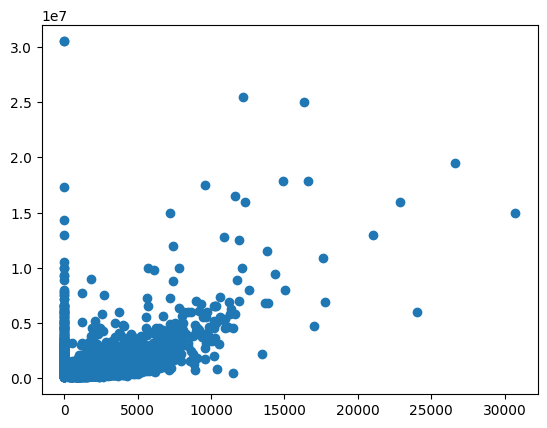

In [6]:
plt.scatter(data[:, 4], data[:, 2])

# Run 2D Gradient Descent Algo

[0/20]: x0 = 0.08748558530715762 x1=162.2980201813022


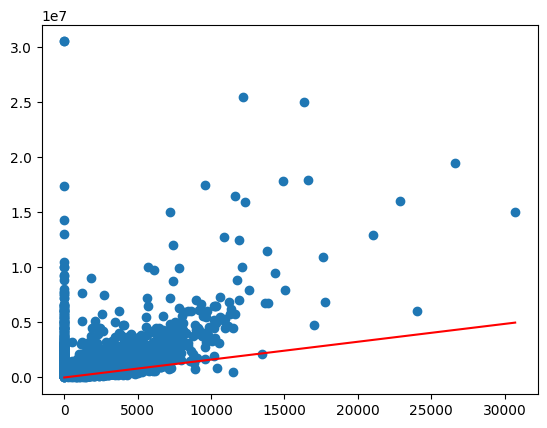

[1/20]: x0 = 0.15193817896770567 x1=241.43015497359113


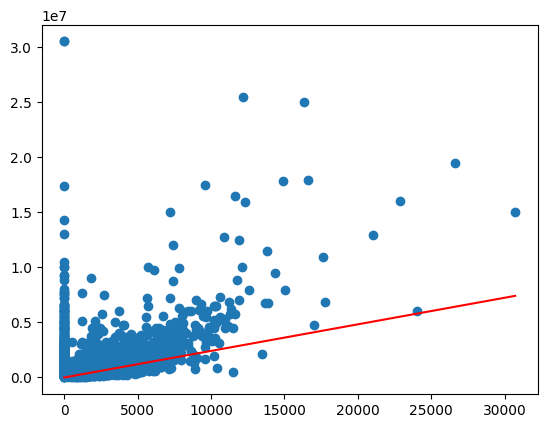

[2/20]: x0 = 0.2051605040374052 x1=280.01284526022783


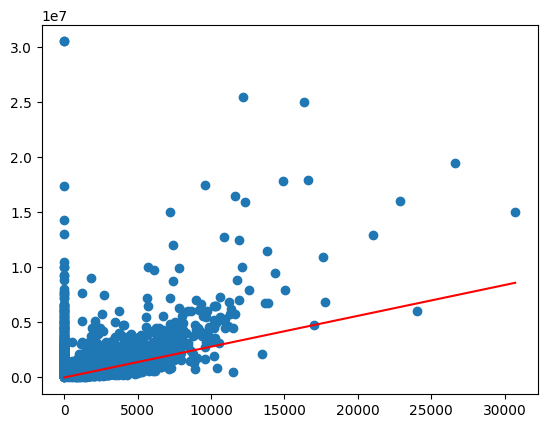

[3/20]: x0 = 0.2529072502105497 x1=298.82471915952027


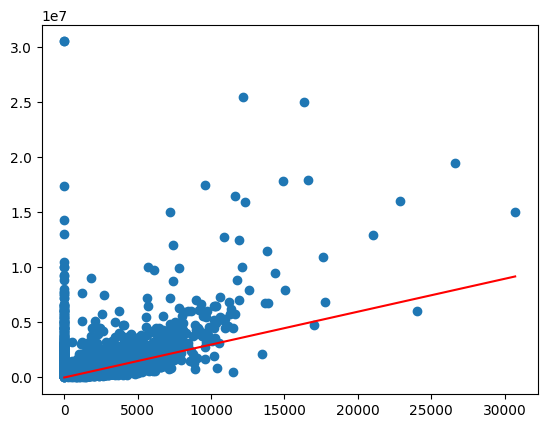

[4/20]: x0 = 0.29798424910084054 x1=307.99687578556086


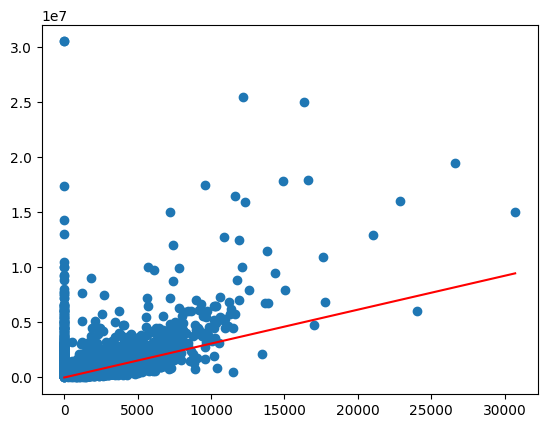

[5/20]: x0 = 0.3417595485896959 x1=312.4689660467276


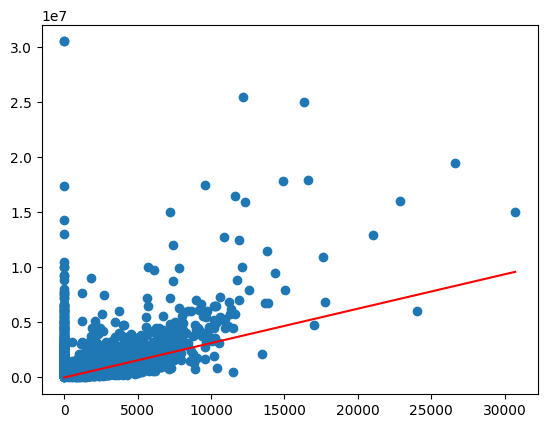

[6/20]: x0 = 0.3849001719570122 x1=314.6494306089192


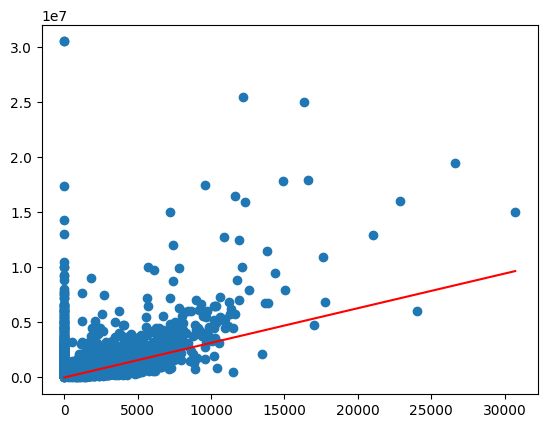

[7/20]: x0 = 0.42773134177868594 x1=315.7125602365573


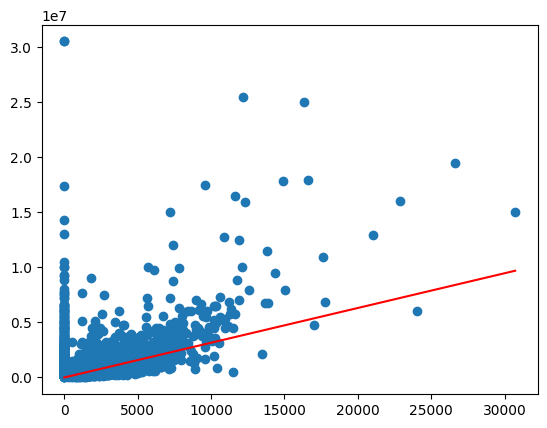

[8/20]: x0 = 0.47041162781840445 x1=316.2309074607994


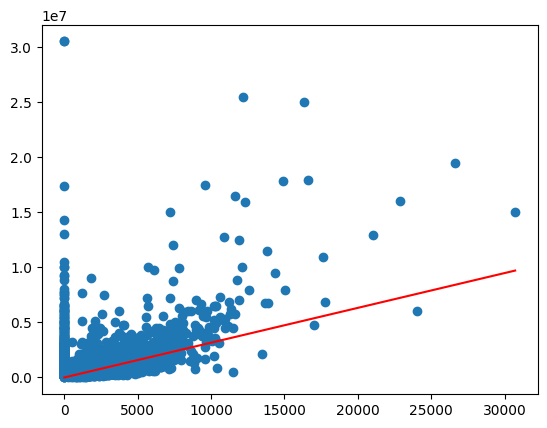

[9/20]: x0 = 0.5130183444196963 x1=316.483633466308


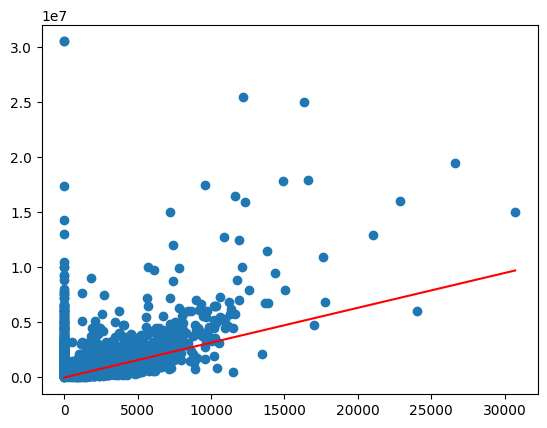

[10/20]: x0 = 0.5555891879729568 x1=316.6068497237002


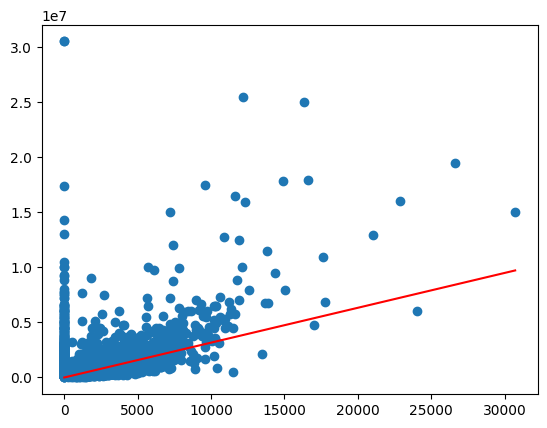

[11/20]: x0 = 0.598142538222265 x1=316.6669205180282


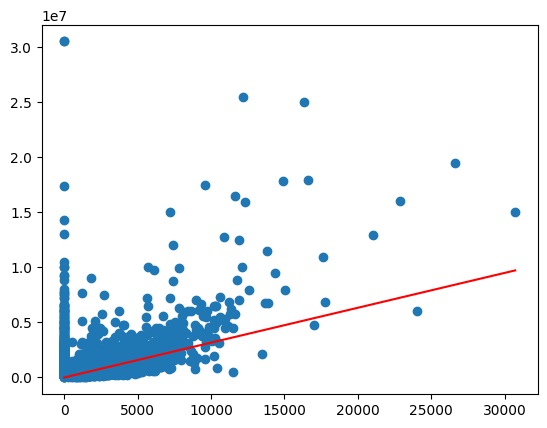

[12/20]: x0 = 0.640687356635519 x1=316.69620328625484


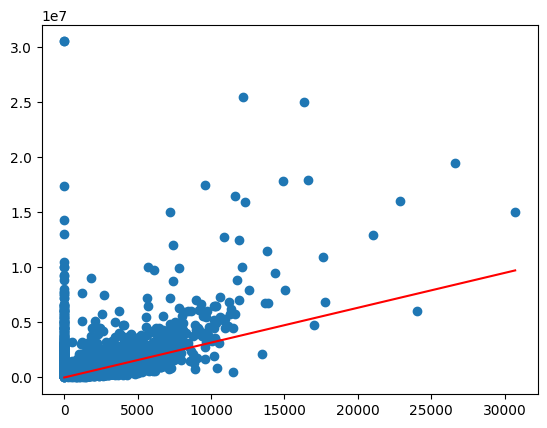

[13/20]: x0 = 0.6832280125829838 x1=316.7104746426461


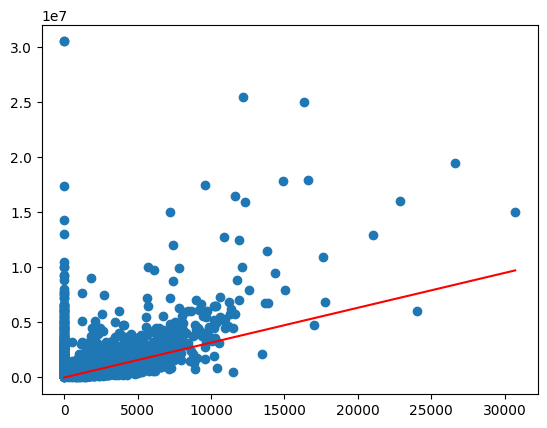

[14/20]: x0 = 0.7257666364518509 x1=316.7174268391698


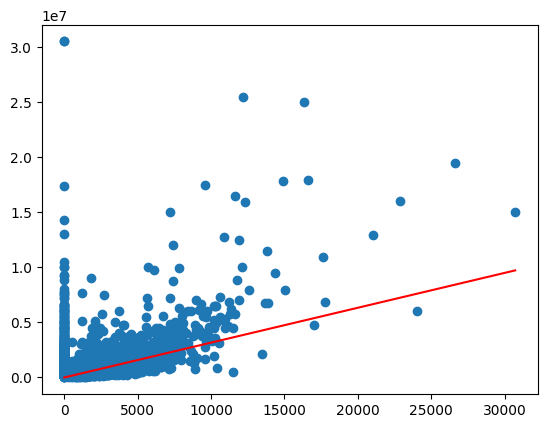

[15/20]: x0 = 0.7683042669614893 x1=316.7208104105813


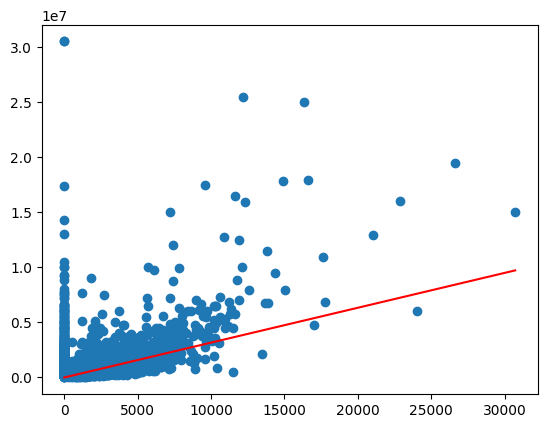

[16/20]: x0 = 0.8108414105634821 x1=316.72245401656176


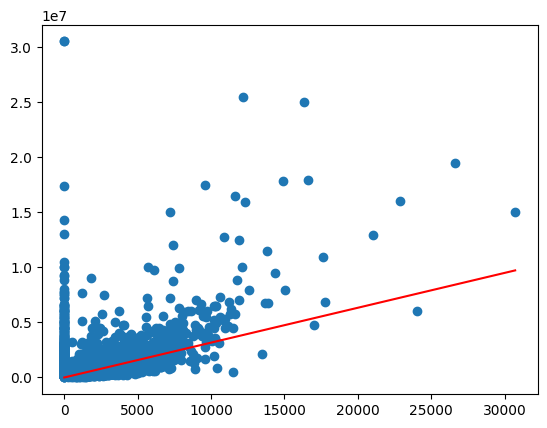

[17/20]: x0 = 0.8533783141899748 x1=316.72324926228674


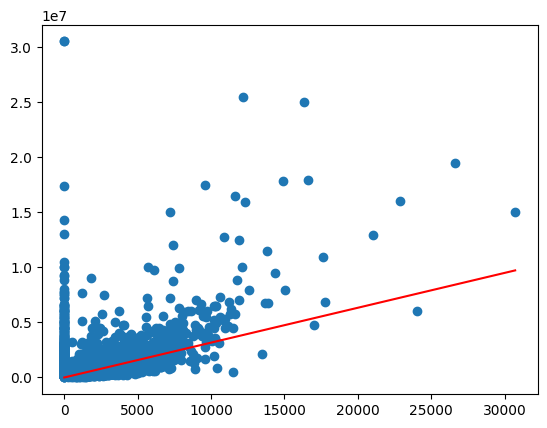

[18/20]: x0 = 0.8959150982384065 x1=316.7236308704146


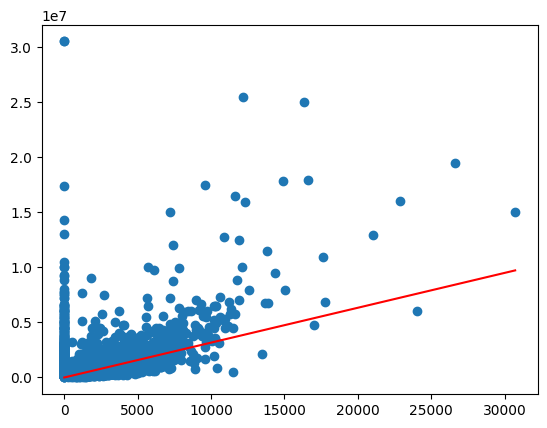

[19/20]: x0 = 0.9384518214113517 x1=316.7238107999958


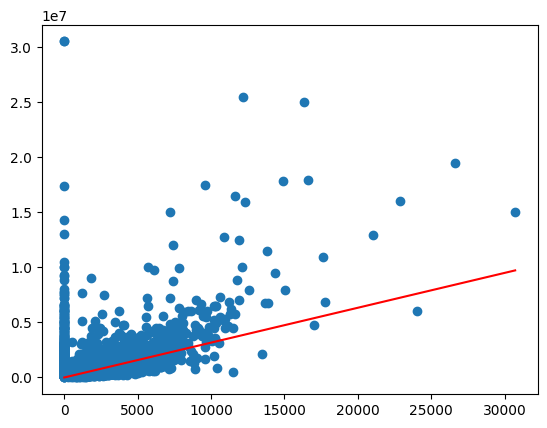

array([[  0.93845182],
       [316.7238108 ]])

In [8]:
placeholder_x = np.arange(np.amax(data[:, 4]))

def sgd(data, training_rate=0.00000000001, iters=20):
    theta = np.array([[0],[0]])
    X = data[:, [4]]
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [2]].T[0]

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, 4], data[:, 2])
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


sgd(data)
